# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Fifth Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 18 October 2016</span>


### Topics to be discussed 

* Linear Algebra
* Linear Transformations
* PCA
* Extensions to PCA


In [69]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline
from bokeh.models import CustomJS, ColumnDataSource, Slider,TextInput
from bokeh.models import TapTool, CustomJS, ColumnDataSource
from bokeh.layouts import column
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.plotting import Figure, output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Slider
from bokeh.io import push_notebook
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)
output_notebook()
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show

Loading BokehJS ...

## Some Basic notions in Linear Algebra

### A vector (or a point in n dimensional space)

In [31]:
x =  np.asarray([[2,2]])
x.shape

(1, 2)

(0, 3)

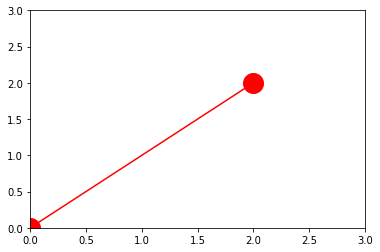

In [32]:
plt.plot([0,x[0,0]],[0,x[0,1]],'-or',markersize=20)

plt.xlim(0,3)
plt.ylim(0,3)

# Matrix Operation

##  $$y =xA $$
### $$ x - > (1xn) $$
### $$ y - > (1xm) $$
### $$ A - > (nxm) $$

### Matrices are acting as linear operator, moving every point from one location to another location


### We can write it like this too
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f32d668cc6edb290dc42e8e00db30dda68c1e29)

<a></a>



### Special Linear transformers

In [33]:
#rotation 90 degrees
A =np.asarray([[0,-1],[1,0]])

y = x.dot(A)
y.shape


(1, 2)

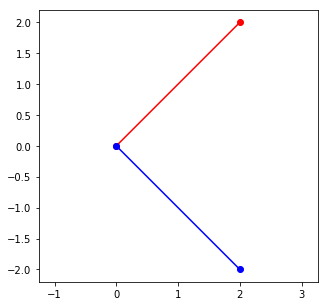

In [34]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

In [35]:
#rotation t degrees
t = np.pi/4.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])

y = x.dot(A)
x.shape

(1, 2)

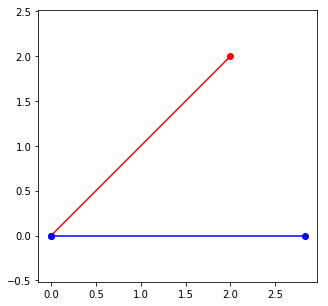

In [36]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

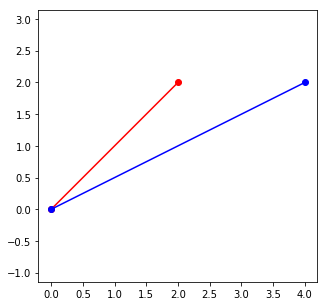

In [37]:

A =np.asarray([[1,1],[1,0]])

y = x.dot(A)
y.shape


fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

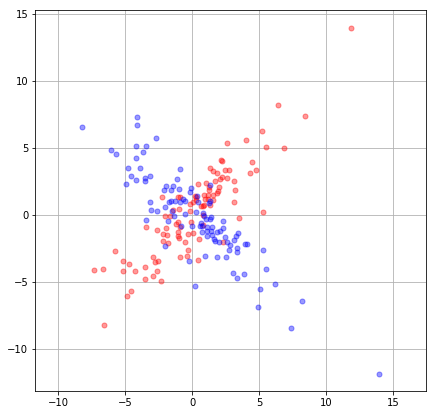

In [38]:
#rotation t degrees
t = 1*np.pi/2.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])


N = 100
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=0,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=0.0, scale=1.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)

Y = X.dot(A)

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );


ax1= plt.subplot(111)
plt.plot(Y[:,0],Y[:,1],'.b',markersize=10,alpha=.4 );


plt.grid();
plt.axis('equal');



# Some known Linear Operators (transformation matrix)
## Usually when we repeatedly use the transformation like in series

### Fiboonatchi series

$$ x_0 = 0 $$
$$ x_1 = 1 $$
$$ xtp_2 = xtp_1 + xt $$




In [39]:
xtp_1=1
xt = 0 
for i in range(10):
    xtp_2 =  xtp_1 + xt
    xt = xtp_1
    xtp_1 = xtp_2
    print xtp_2

1
2
3
5
8
13
21
34
55
89


# In Matrix Form

If we write down these two equations:
    $$ xtp_2 = xtp_1 + xt $$
    $$xtp_1 = xtp_1$$

Then, we have a system of equation as follows

$$[xtp_2, xtp_1] = [xtp_1, xt][[1,1],[1,0]]$$



In [40]:
F =np.asarray([[1,1],[1,0]])
print(np.matrix(F)) 

[[1 1]
 [1 0]]


In [41]:
xtp_1=1
xt = 0
X = np.asarray([xtp_1,xt])
print X[0]
for i in range(10):
    X = X.dot(F)
    print X[0]

1
1
2
3
5
8
13
21
34
55
89


# Markov Chians

### x = x.dot(M)
### Where M has a certain condition 

In [13]:
M =np.asarray([[.9,.1],[.5,.5]])

print(np.matrix(M)) 
print 
x = np.asarray([0,1])
print x
for i in range(20):
    x = x.dot(M)
    print x
print x

[[ 0.9  0.1]
 [ 0.5  0.5]]

[0 1]
[ 0.5  0.5]
[ 0.7  0.3]
[ 0.78  0.22]
[ 0.812  0.188]
[ 0.8248  0.1752]
[ 0.82992  0.17008]
[ 0.831968  0.168032]
[ 0.8327872  0.1672128]
[ 0.83311488  0.16688512]
[ 0.83324595  0.16675405]
[ 0.83329838  0.16670162]
[ 0.83331935  0.16668065]
[ 0.83332774  0.16667226]
[ 0.8333311  0.1666689]
[ 0.83333244  0.16666756]
[ 0.83333298  0.16666702]
[ 0.83333319  0.16666681]
[ 0.83333328  0.16666672]
[ 0.83333331  0.16666669]
[ 0.83333332  0.16666668]
[ 0.83333332  0.16666668]


# Let's go back to Data Driven models and Machine Learning

### where we are interested to find certain Matrices
### While in the previous examples, we have a matrix and then, want to see how the system will behave.

### But in machine learning we are usually interested in designing or learning certain operators

## Principal component analysis (PCA)
## The basic idea: 
### we have observed  $ x $ is it possible to to find a transformation, where in the new space the new dimensions are independent. 

## $$ x = yP $$
##  $$x = \sum_{i = 1}^n a_i. p_i$$

## $p_i$ is an n dimensional column vector. 



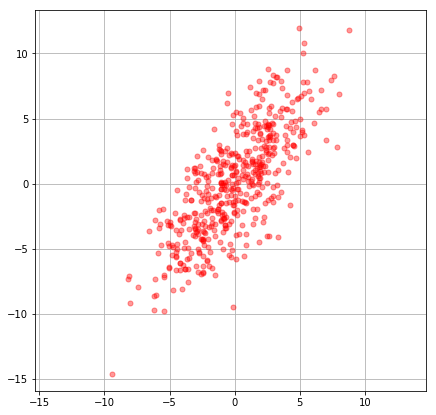

In [42]:
N = 500
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=0,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=0.0, scale=2.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)



fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

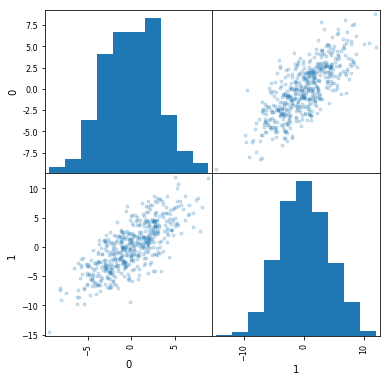

In [43]:
# look how dependent are the two original dimensions 
# X_trans = X.dot(PCs[:,:5])
DF = pd.DataFrame(data=X)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

In [44]:
# Normalizing it around 0
X = X-np.mean(X,axis=0)


XTX = X.T.dot(X)/(X.shape[0]-1)
np.around(XTX,decimals=3)
# This is a multiplication of the covariance matrix we discussed before

array([[  9.474,   9.611],
       [  9.611,  16.868]])

In [45]:
COVX = np.cov(X.T)
np.around(COVX,decimals=3)

array([[  9.474,   9.611],
       [  9.611,  16.868]])

In [46]:

# if we calculate the eigenvectors of the covariance matrix, they are the requested operator in PCA
VARs,PCs = np.linalg.eig(XTX)
# VARs,PCs = np.linalg.eig(np.cov(X.T))
indsort = np.argsort(VARs*-1,)
PCs = PCs[:,indsort]
VARs = VARs[indsort]
print np.sum(VARs)
VARs = VARs/np.sum(VARs)*20

26.3420192865


In [47]:
PCs

array([[-0.56612857, -0.82431695],
       [-0.82431695,  0.56612857]])

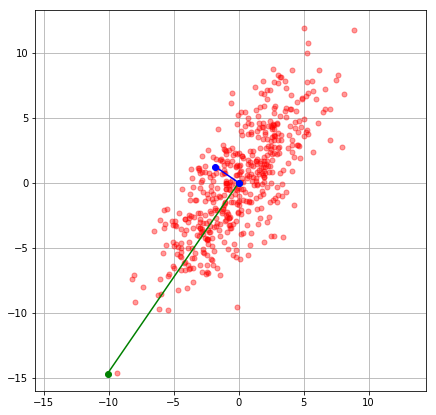

In [48]:
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );
plt.plot([0,PCs[0,0]*VARs[0]],[0,PCs[1,0]*VARs[0]],'-og')
plt.plot([0,PCs[0,1]*VARs[1]],[0,PCs[1,1]*VARs[1]],'-ob')
plt.grid();
plt.axis('equal');

In [49]:
PCs

array([[-0.56612857, -0.82431695],
       [-0.82431695,  0.56612857]])

In [50]:
VARs = VARs/np.sum(VARs)
VARs

array([ 0.89092398,  0.10907602])

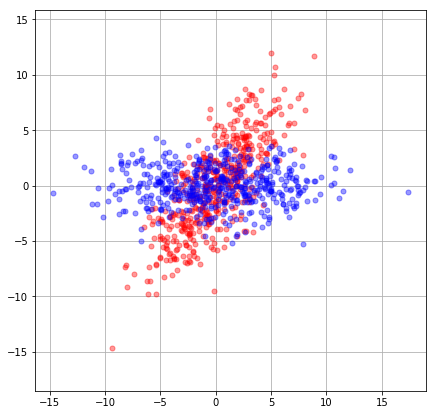

In [51]:
fig = plt.figure(figsize=(7,7))
X_trans = X.dot(PCs[:])
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

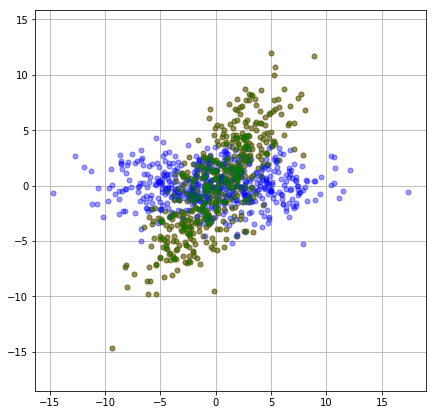

In [52]:

fig = plt.figure(figsize=(7,7))



X_trans = X.dot(PCs[:])


plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );


# Parametric transformation
X_ =   X_trans.dot(([1,1.0]*PCs).T)

plt.plot(X_ [:,0],X_ [:,1],'.g',markersize=10,alpha=.4 );

plt.grid();
plt.axis('equal');

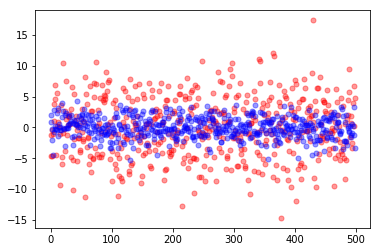

In [53]:

X_trans = X.dot(PCs[:,0])
plt.plot(X_trans,'.r',markersize=10,alpha=.4 );

X_trans = X.dot(PCs[:,1])
plt.plot(X_trans,'.b',markersize=10,alpha=.4 );


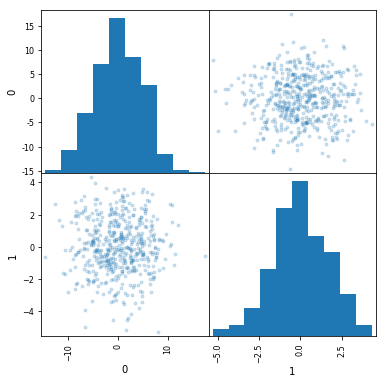

In [54]:
# look how independent they are 
X_trans = X.dot(PCs)
DF = pd.DataFrame(data=X_trans)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

In [55]:
# This shows the orthogonality
XtrsnTXtrsn = X_trans.T.dot(X_trans)/(X_trans.shape[0]-1)
np.around(XtrsnTXtrsn,decimals=3)

array([[ 23.469,  -0.   ],
       [ -0.   ,   2.873]])

# What is this good for?
### Dimensionality reduction and feature extraction -- > To reduce the curse of dimensionality for prediction problems
### Data Compression
### Generative space

# A more exciting example

In [56]:
from sklearn.datasets import fetch_mldata


from sklearn.datasets import fetch_olivetti_faces

# Face data set
image_shape = (64, 64)
dataset = fetch_olivetti_faces()
faces = dataset.data[range(0,400,10)]
faces = dataset.data[:]
X = faces[:]
X.shape









(400, 4096)

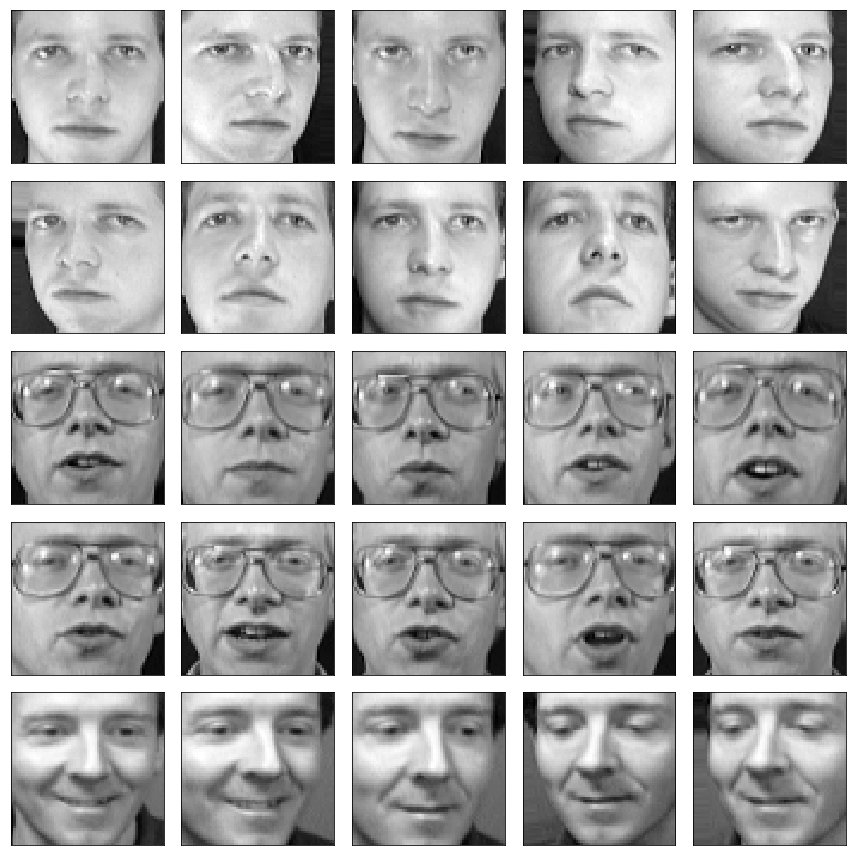

In [57]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(faces[i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [58]:
def PCA(Y):
    Y_mean = np.mean(Y,axis=0)
    Y = Y - Y_mean 
    # local centering
#     Y -= Y.mean(axis=1).reshape(Y.shape[0], -1)

    YTY = Y.T.dot(Y)
    
    VARs,PCs = np.linalg.eig(YTY)
    VARs = np.real(VARs)
    PCs = np.real(PCs)
    indsort = np.argsort(VARs*-1,)
    PCs = PCs[:,indsort]
    VARs = VARs[indsort]
    VARs = VARs/np.sum(VARs)
    return PCs,VARs

In [59]:
PCs,VARs = PCA(X)

In [60]:
PCs.shape

(4096, 4096)

# Eigen Pictures

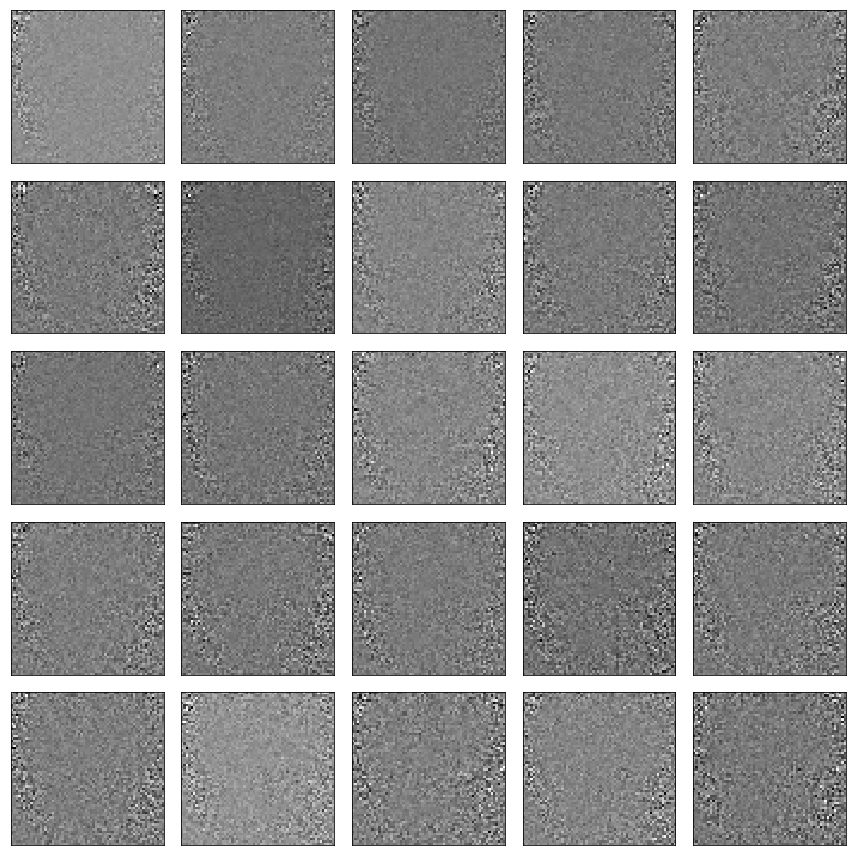

In [61]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(PCs[:,400+i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [62]:
PCs[0].dot(PCs[11])

2.1827873e-08

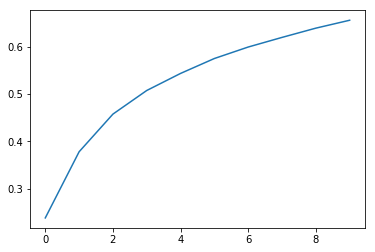

In [63]:
# Explained Variance
plt.plot(np.cumsum(VARs[:10]));

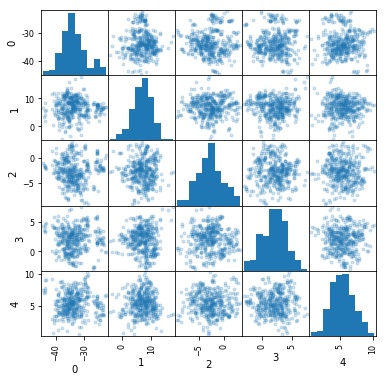

In [64]:
# look how independent they are 
X_trans = X.dot(PCs[:,:5])
DF = pd.DataFrame(data=X_trans)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

# Using PCA as a generative tool

In [126]:
def generate(p0=None,p1=None,p2=None,p3=None,p4=None,p5=None,p6=None,p7=None,p8=None,p9=None):
    fig = plt.figure(figsize=(7,7))
    x = np.asarray([p0,p1,p2,p3,p4,p5,p6,p7,p8,p9]).T[np.newaxis,:]
    
    n_comps = x.shape[1]
#     X_trans = X.dot(PCs[:,:n_comps])
    x_ = x.dot(PCs[:,:n_comps].T)
#     X_ = x_ + X_mean
    plt.subplot(2,1,1)
    plt.imshow(x_.reshape(image_shape),cmap=plt.cm.Greys_r);
    plt.xticks([]);
    plt.yticks([]);

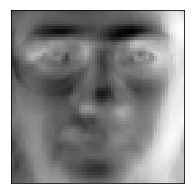

In [127]:
fig = plt.figure(figsize=(7,7))

coeffs = np.random.randn(4,1)
n_comps = coeffs.shape[0]
sel_pcs = PCs[:,:n_comps]
x_ = sel_pcs.dot(coeffs)
columns = []
for i in range(sel_pcs.shape[0]):
    columns.append('pc_'+str(i))

columns.append('coeffs')

df = pd.DataFrame(data=np.concatenate((sel_pcs.T,coeffs),axis=1),columns=columns)
plt.subplot(2,1,1)
plt.imshow(x_.reshape(image_shape),cmap=plt.cm.Greys_r);
plt.xticks([]);
plt.yticks([]);

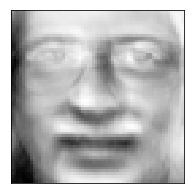

In [128]:
from ipywidgets import interact, HTML, FloatSlider
# interact(generate,a0=(a, b,.2));
interact(generate,p0=(-3,3,.1),p1=(-3,3,.1),p2=(-3,3,.1),p3=(-3,3,.1),p4=(-3,3,.1),
        p5=(-3,3,.1),p6=(-3,3,.1),p7=(-3,3,.1),p8=(-3,3,.1),p9=(-3,3,.1));

## Chairs

(696, 4096)


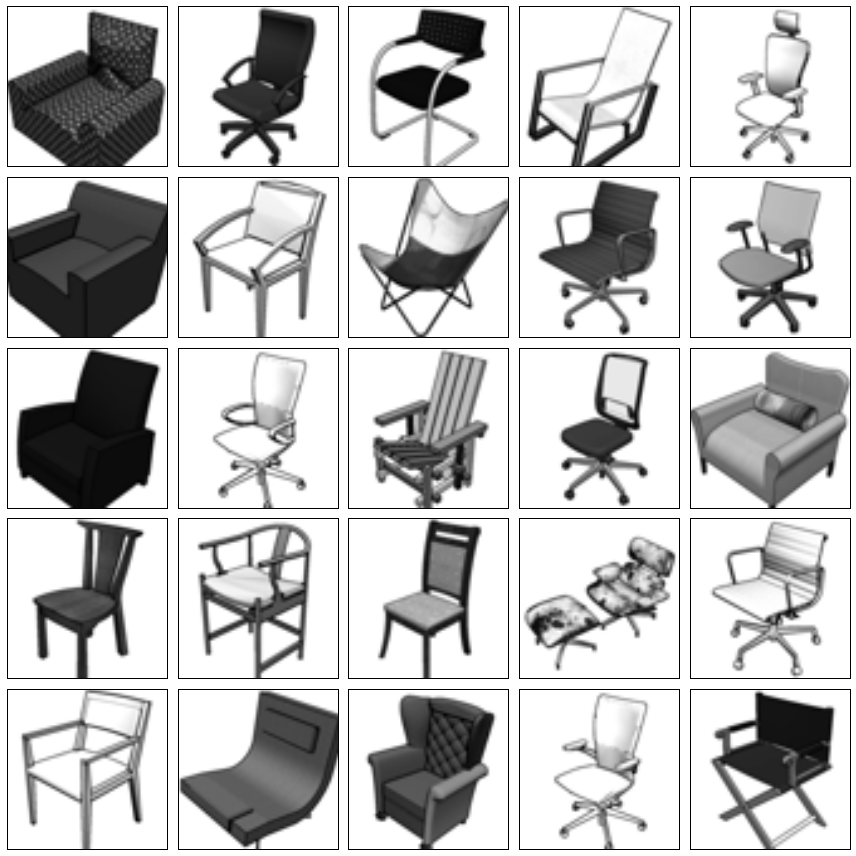

In [139]:
from sklearn.datasets import fetch_mldata


from sklearn.datasets import fetch_olivetti_faces





#Chairs
path = "./Data/chairs.csv"
D = pd.read_csv(path,header=None)
image_shape = (64,64)
X = D.values[:]
print X.shape


# # Mnist data set
# image_shape = (28, 28)
# dataset = fetch_mldata('MNIST original')
# # faces = dataset.data
# X = faces[:]
# X.shape


fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()





In [140]:
PCs,VARs = PCA(X)

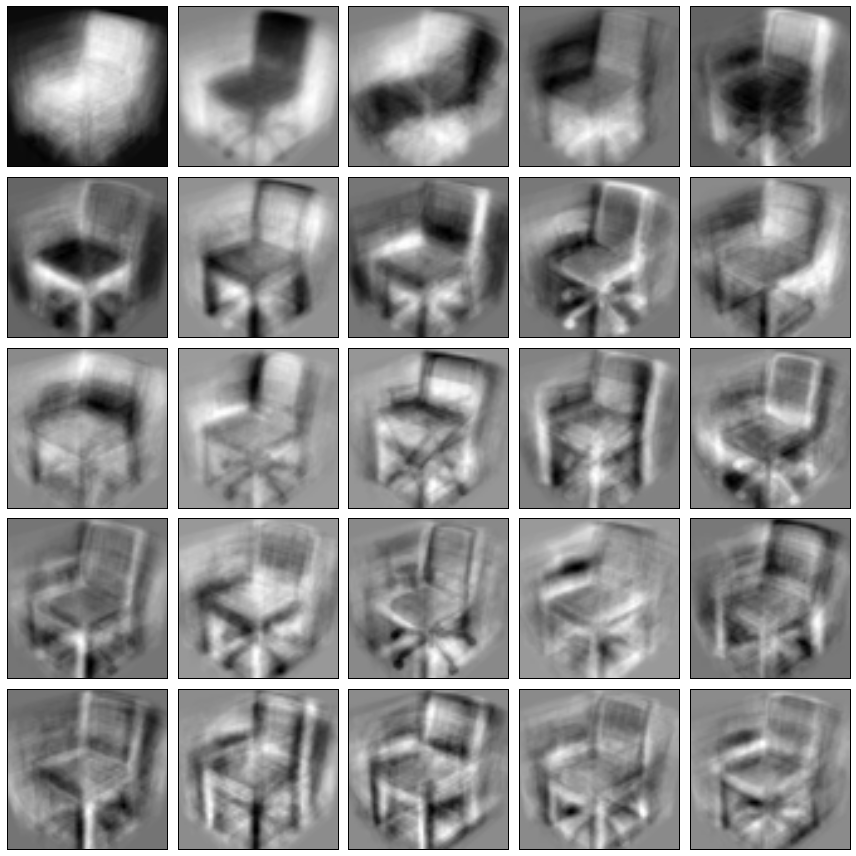

In [141]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(PCs[:,i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

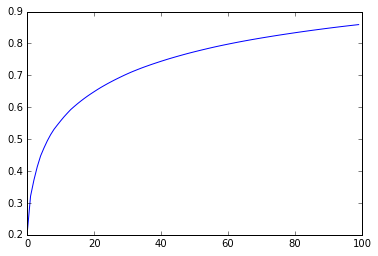

In [142]:
# Explained Variance
plt.plot(np.cumsum(VARs[:100]));

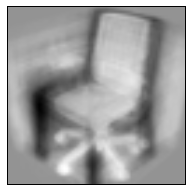

In [143]:
from ipywidgets import interact, HTML, FloatSlider
# interact(generate,a0=(a, b,.2));
interact(generate,p0=(-3,3,.1),p1=(-3,3,.1),p2=(-3,3,.1),p3=(-3,3,.1),p4=(-3,3,.1),
        p5=(-3,3,.1),p6=(-3,3,.1),p7=(-3,3,.1),p8=(-3,3,.1),p9=(-3,3,.1));

# Floor PLans

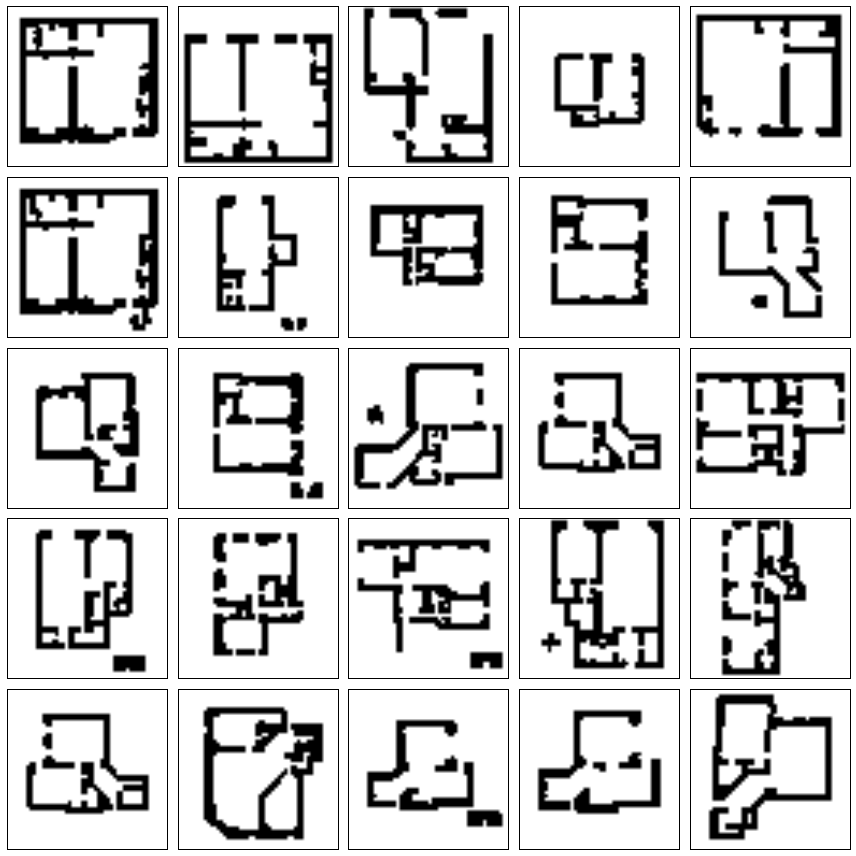

In [144]:
from sklearn.datasets import fetch_mldata


from sklearn.datasets import fetch_olivetti_faces





# floorplan
path =  "./Data/1000FloorPlans.csv"
D = pd.read_csv(path,header=None)
image_shape = (50, 50)
faces = D.values[:]
faces[faces>0] = -1
faces[faces==0] = 1
faces[faces==-1] = 0
X = faces[:]
X.shape


fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()


In [145]:
PCs,VARs = PCA(X)

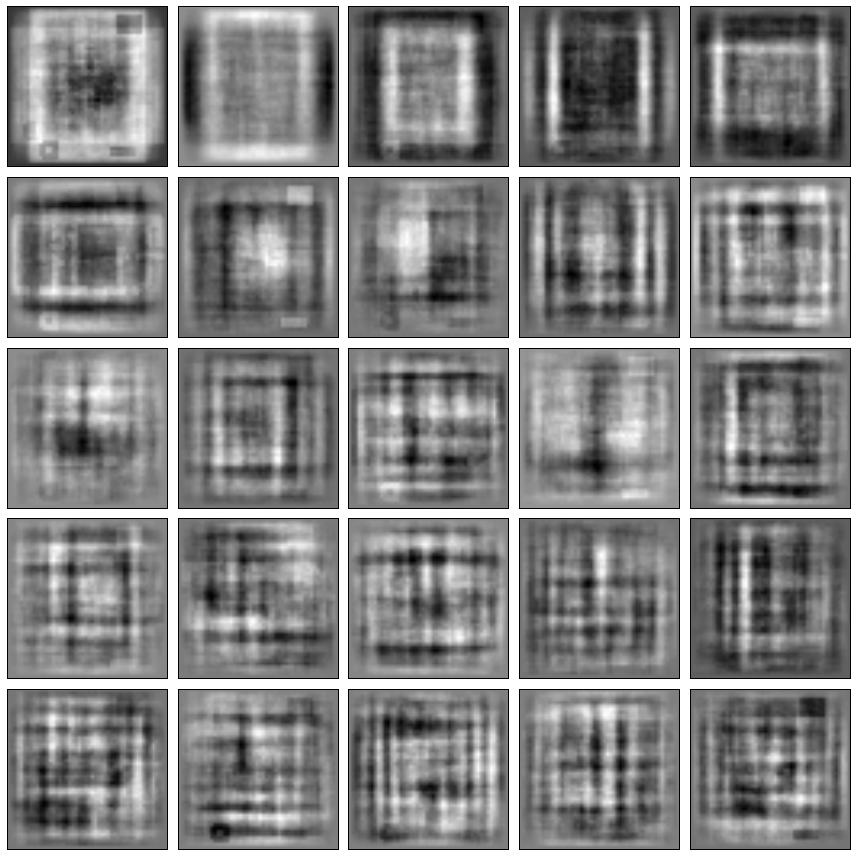

In [146]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(PCs[:,i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

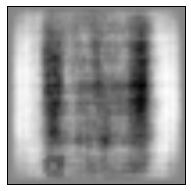

In [147]:
from ipywidgets import interact, HTML, FloatSlider
# interact(generate,a0=(a, b,.2));
interact(generate,p0=(-3,3,.1),p1=(-3,3,.1),p2=(-3,3,.1),p3=(-3,3,.1),p4=(-3,3,.1),
        p5=(-3,3,.1),p6=(-3,3,.1),p7=(-3,3,.1),p8=(-3,3,.1),p9=(-3,3,.1));

# Extensions to PCA

* **Independent CA (ICA)**
    * Where we relax the assumption of orthogonality of compenents
* **Kernel PCA**
    * Will be discussed with Support Vector Machines and Kernel Tricks
* **LDA** 
* **LSA**
* **Factor Analysis**
* **Ranom Projection**
* **Randomized pca**
* ** Stack of PCAs**
    * **Toward Deep networks of Autoencoders**
## Go here with all the extensions:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

# sparse codeing (Over complete basis)

## if we look at PCA as an optimization problem
![](http://ufldl.stanford.edu/wiki/images/math/f/1/1/f110901ddedcba59e339de5f16c547da.png)


In [148]:
# floorplan
path = "./Data/1000FloorPlans.csv"
D = pd.read_csv(path,header=None)
image_shape = (50, 50)
faces = D.values[:]
faces[faces>0] = -1
faces[faces==0] = 1
faces[faces==-1] = 0
X = faces[:]
X.shape

(999, 2500)

In [149]:
from sklearn.decomposition import sparse_encode
K = 200
from sklearn.decomposition import MiniBatchDictionaryLearning
sc = MiniBatchDictionaryLearning(K)
sc.fit(X)

MiniBatchDictionaryLearning(alpha=1, batch_size=3, dict_init=None,
              fit_algorithm='lars', n_components=200, n_iter=1000,
              n_jobs=1, random_state=None, shuffle=True, split_sign=False,
              transform_algorithm='omp', transform_alpha=None,
              transform_n_nonzero_coefs=None, verbose=False)

In [150]:
sc.components_.shape

(200, 2500)

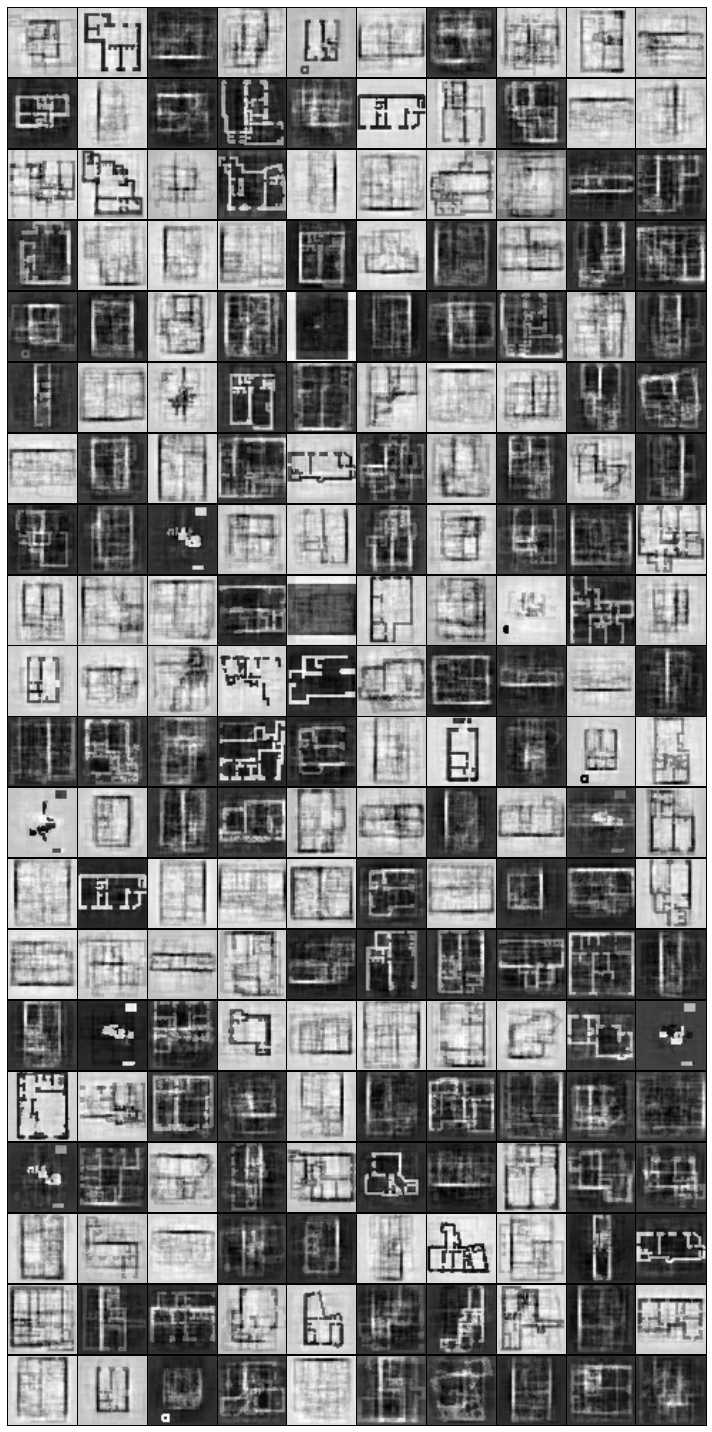

In [151]:
fig = plt.figure(figsize=(10,20))
for i in range(200):
    plt.subplot(20,10,i+1)
    plt.imshow(sc.components_[i,:].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout(h_pad=.01, w_pad=.01)


In [57]:
code = sparse_encode(X, sc.components_)


In [152]:
X.shape

(999, 2500)

In [153]:
code.shape

(999, 200)

In [154]:
i = 100
reconstructed_pic = code[i].dot(sc.components_)

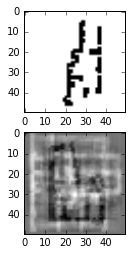

In [155]:
plt.subplot(2,1,1)
plt.imshow(X[i].reshape(image_shape),cmap=plt.cm.gray);
plt.subplot(2,1,2)
plt.imshow(reconstructed_pic.reshape(image_shape),cmap=plt.cm.gray);

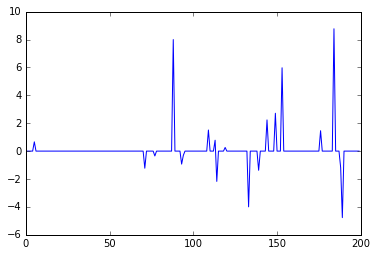

In [156]:
plt.plot(code[i])


# Now to generate new things?

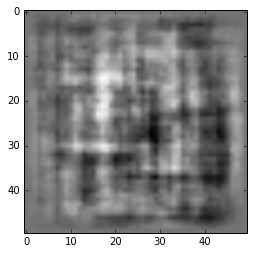

In [157]:
# if we use any random weight?

randcod = np.random.randint(-6,high=10,size=200)[np.newaxis,:]
reconstructed_pic = randcod.dot(sc.components_)
plt.imshow(reconstructed_pic.reshape(image_shape),cmap=plt.cm.gray);

# Further steps

# How to learn the probabilistic space of these coeffecients of components?
# How to have hierarchical representations?


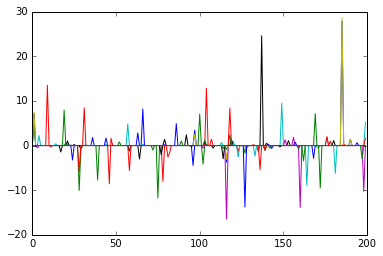

In [158]:
# But if we learn the space of codes (a 200 dimensional space in this example)
# in Principle, similar floor plans have similar codes
for i in range(10):
    plt.plot(code[i]);


# Sprase Coding on Patches
### Usually to be used as edge detector for hierarchical representations for Classification/Prediction problems

In [159]:
from sklearn.feature_extraction.image import extract_patches_2d
rng = np.random.RandomState(0)
patch_size = (20, 20)
buffer = []
for img in X:
        data = extract_patches_2d(img.reshape(image_shape), patch_size, max_patches=100,
                                  random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.extend(data)
Patch_X = np.asarray(buffer)

In [160]:
len(Patch_X)

99900

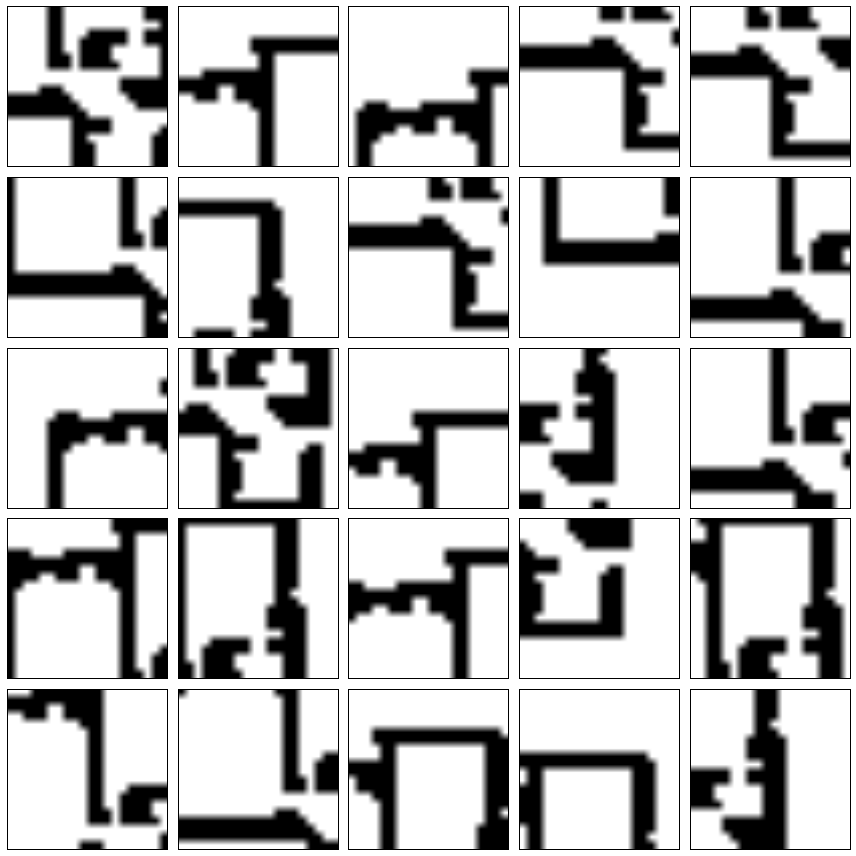

In [161]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Patch_X[1000+i].reshape(patch_size),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [162]:
from sklearn.decomposition import sparse_encode
K = 200
from sklearn.decomposition import MiniBatchDictionaryLearning
# MiniBatchDictionaryLearning(n_components=200, alpha=1, n_iter=500)
sc_patch = MiniBatchDictionaryLearning(n_components=K,n_iter=2000)
sc_patch.fit(Patch_X)

MiniBatchDictionaryLearning(alpha=1, batch_size=3, dict_init=None,
              fit_algorithm='lars', n_components=200, n_iter=2000,
              n_jobs=1, random_state=None, shuffle=True, split_sign=False,
              transform_algorithm='omp', transform_alpha=None,
              transform_n_nonzero_coefs=None, verbose=False)

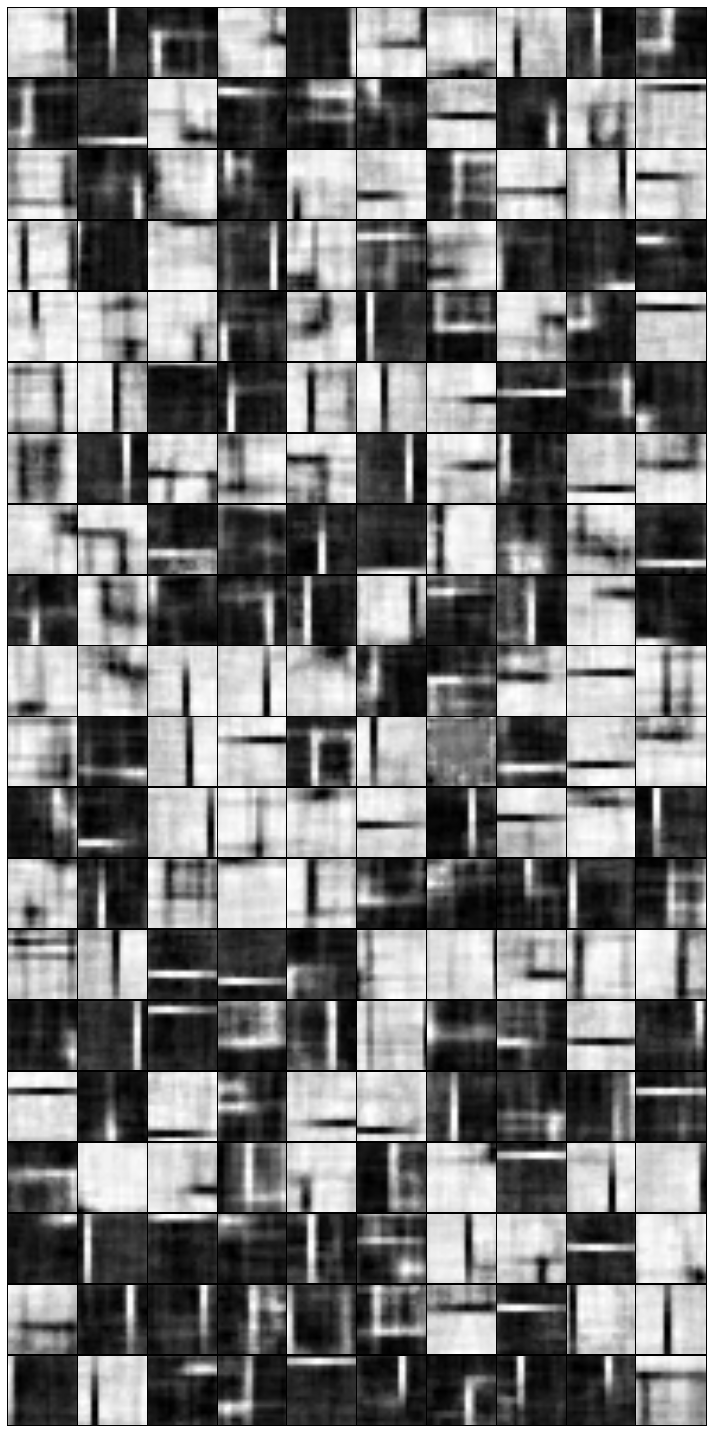

In [163]:
fig = plt.figure(figsize=(10,20))
for i in range(200):
    plt.subplot(20,10,i+1)
    plt.imshow(sc_patch.components_[i,:].reshape(patch_size),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout(h_pad=.01, w_pad=.01)

In [164]:
code_patch = sparse_encode(Patch_X[:1000], sc_patch.components_)

In [165]:
i = 100
reconstructed_patch = code_patch[i].dot(sc_patch.components_)

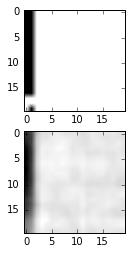

In [166]:
plt.subplot(2,1,1)
plt.imshow(Patch_X[i].reshape(patch_size),cmap=plt.cm.gray);
plt.subplot(2,1,2)
plt.imshow(reconstructed_patch.reshape(patch_size),cmap=plt.cm.gray);

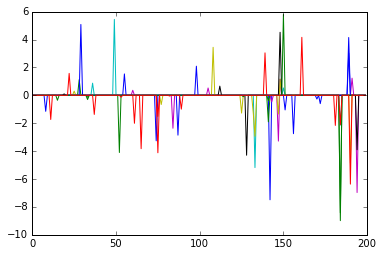

In [167]:
# But if we learn the space of codes (a 200 dimensional space in this example)
# in Principle, similar floor plans have similar codes
for i in range(10):
    plt.plot(code_patch[i]);